In [1]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, ZeroPadding2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [2]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [3]:
X_train, y_train = load_mnist('fashionmnist', kind='train')
X_test, y_test = load_mnist('fashionmnist', kind='t10k')

In [4]:
X_test.shape

(10000, 784)

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
X_train[1000]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 97],
        [ 84],
        [ 97],
        [110],
        [108],
        [ 87],
        [ 97],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 19],
        [255],
        [199],
        [183],
        [142],
        [161],
        [200],
        [213],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
model = Sequential([
    ZeroPadding2D(padding=(1, 1), input_shape=(28, 28, 1)),
    Conv2D(32, 3, activation='relu'),
    Dropout(0.2),
    MaxPool2D(pool_size=2, strides=2),
    ZeroPadding2D(padding=(1, 1)),
    Conv2D(64, 3, activation='relu'),
    Dropout(0.2),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])
model.summary()

e:\programming practice\yolov7\venv7\lib\site-packages\keras\src\layers\reshaping\zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ zero_padding2d (ZeroPadding2D)  │ (None, 30, 30, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_1                │ (None, 16, 16, 32)     │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [14]:
history = model.fit(X_train, y_train_ohe, epochs=5, validation_data=(X_test, y_test_ohe), batch_size=300)

Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 56s 237ms/step - accuracy: 0.6630 - loss: 0.9532 - val_accuracy: 0.8562 - val_loss: 0.4407
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 47s 234ms/step - accuracy: 0.8478 - loss: 0.4307 - val_accuracy: 0.8713 - val_loss: 0.3736
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 47s 235ms/step - accuracy: 0.8702 - loss: 0.3653 - val_accuracy: 0.8831 - val_loss: 0.3361
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 47s 235ms/step - accuracy: 0.8807 - loss: 0.3338 - val_accuracy: 0.8911 - val_loss: 0.3046
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 47s 235ms/step - accuracy: 0.8894 - loss: 0.3094 - val_accuracy: 0.8935 - val_loss: 0.2964


<Axes: >

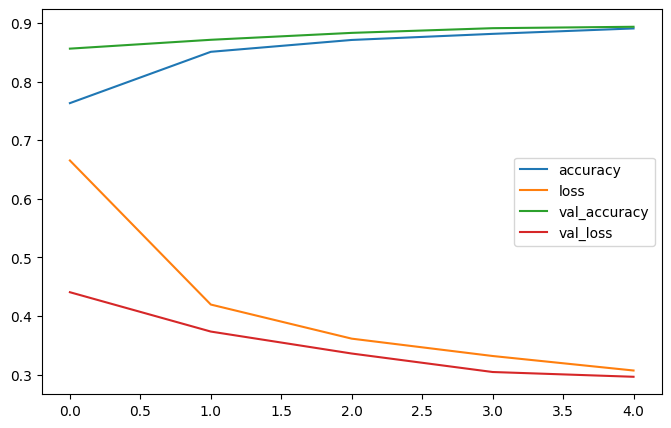

In [15]:
import pandas as pd
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
pd.DataFrame(history.history).plot(figsize=(8,5))

In [16]:
history.history

{'accuracy': [0.7632499933242798,
  0.8507999777793884,
  0.8710333108901978,
  0.8814166784286499,
  0.8906499743461609],
 'loss': [0.6654127240180969,
  0.41965505480766296,
  0.36147961020469666,
  0.3318861126899719,
  0.3071329891681671],
 'val_accuracy': [0.8561999797821045,
  0.8712999820709229,
  0.8830999732017517,
  0.8910999894142151,
  0.8934999704360962],
 'val_loss': [0.4407007694244385,
  0.3735712766647339,
  0.33611759543418884,
  0.30457741022109985,
  0.2964468002319336]}

names of layers

In [17]:
layer_names = [layer.name for layer in model.layers]
layer_names

['zero_padding2d',
 'conv2d',
 'dropout',
 'max_pooling2d',
 'zero_padding2d_1',
 'conv2d_1',
 'dropout_1',
 'max_pooling2d_1',
 'flatten',
 'dense',
 'dropout_2',
 'dense_1']

output of the layers

In [18]:
layer_outputs = [layer.output for layer in model.layers]
layer_outputs

[<KerasTensor shape=(None, 30, 30, 1), dtype=float32, sparse=False, name=keras_tensor_1>,
 <KerasTensor shape=(None, 28, 28, 32), dtype=float32, sparse=False, name=keras_tensor_2>,
 <KerasTensor shape=(None, 28, 28, 32), dtype=float32, sparse=False, name=keras_tensor_3>,
 <KerasTensor shape=(None, 14, 14, 32), dtype=float32, sparse=False, name=keras_tensor_4>,
 <KerasTensor shape=(None, 16, 16, 32), dtype=float32, sparse=False, name=keras_tensor_5>,
 <KerasTensor shape=(None, 14, 14, 64), dtype=float32, sparse=False, name=keras_tensor_6>,
 <KerasTensor shape=(None, 14, 14, 64), dtype=float32, sparse=False, name=keras_tensor_7>,
 <KerasTensor shape=(None, 7, 7, 64), dtype=float32, sparse=False, name=keras_tensor_8>,
 <KerasTensor shape=(None, 3136), dtype=float32, sparse=False, name=keras_tensor_9>,
 <KerasTensor shape=(None, 128), dtype=float32, sparse=False, name=keras_tensor_10>,
 <KerasTensor shape=(None, 128), dtype=float32, sparse=False, name=keras_tensor_11>,
 <KerasTensor shape=

Feature maps visualization Model from CNN Layers

In [41]:
def visualize_feature_maps(model, layer_names, input_image):
    outputs = [model.get_layer(layer_name).output for layer_name in layer_names]
    visualization_model = Model(inputs=model.inputs, outputs=outputs)
    feature_maps = visualization_model.predict(input_image)
    
    for layer_name, feature_map in zip(layer_names, feature_maps):
        size = feature_map.shape[1]
        n_features = feature_map.shape[-1]
        display_grid = np.zeros((size, size * n_features))
        
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            display_grid[:, i * size : (i + 1) * size] = x
        
        scale = 20 / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='gray')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


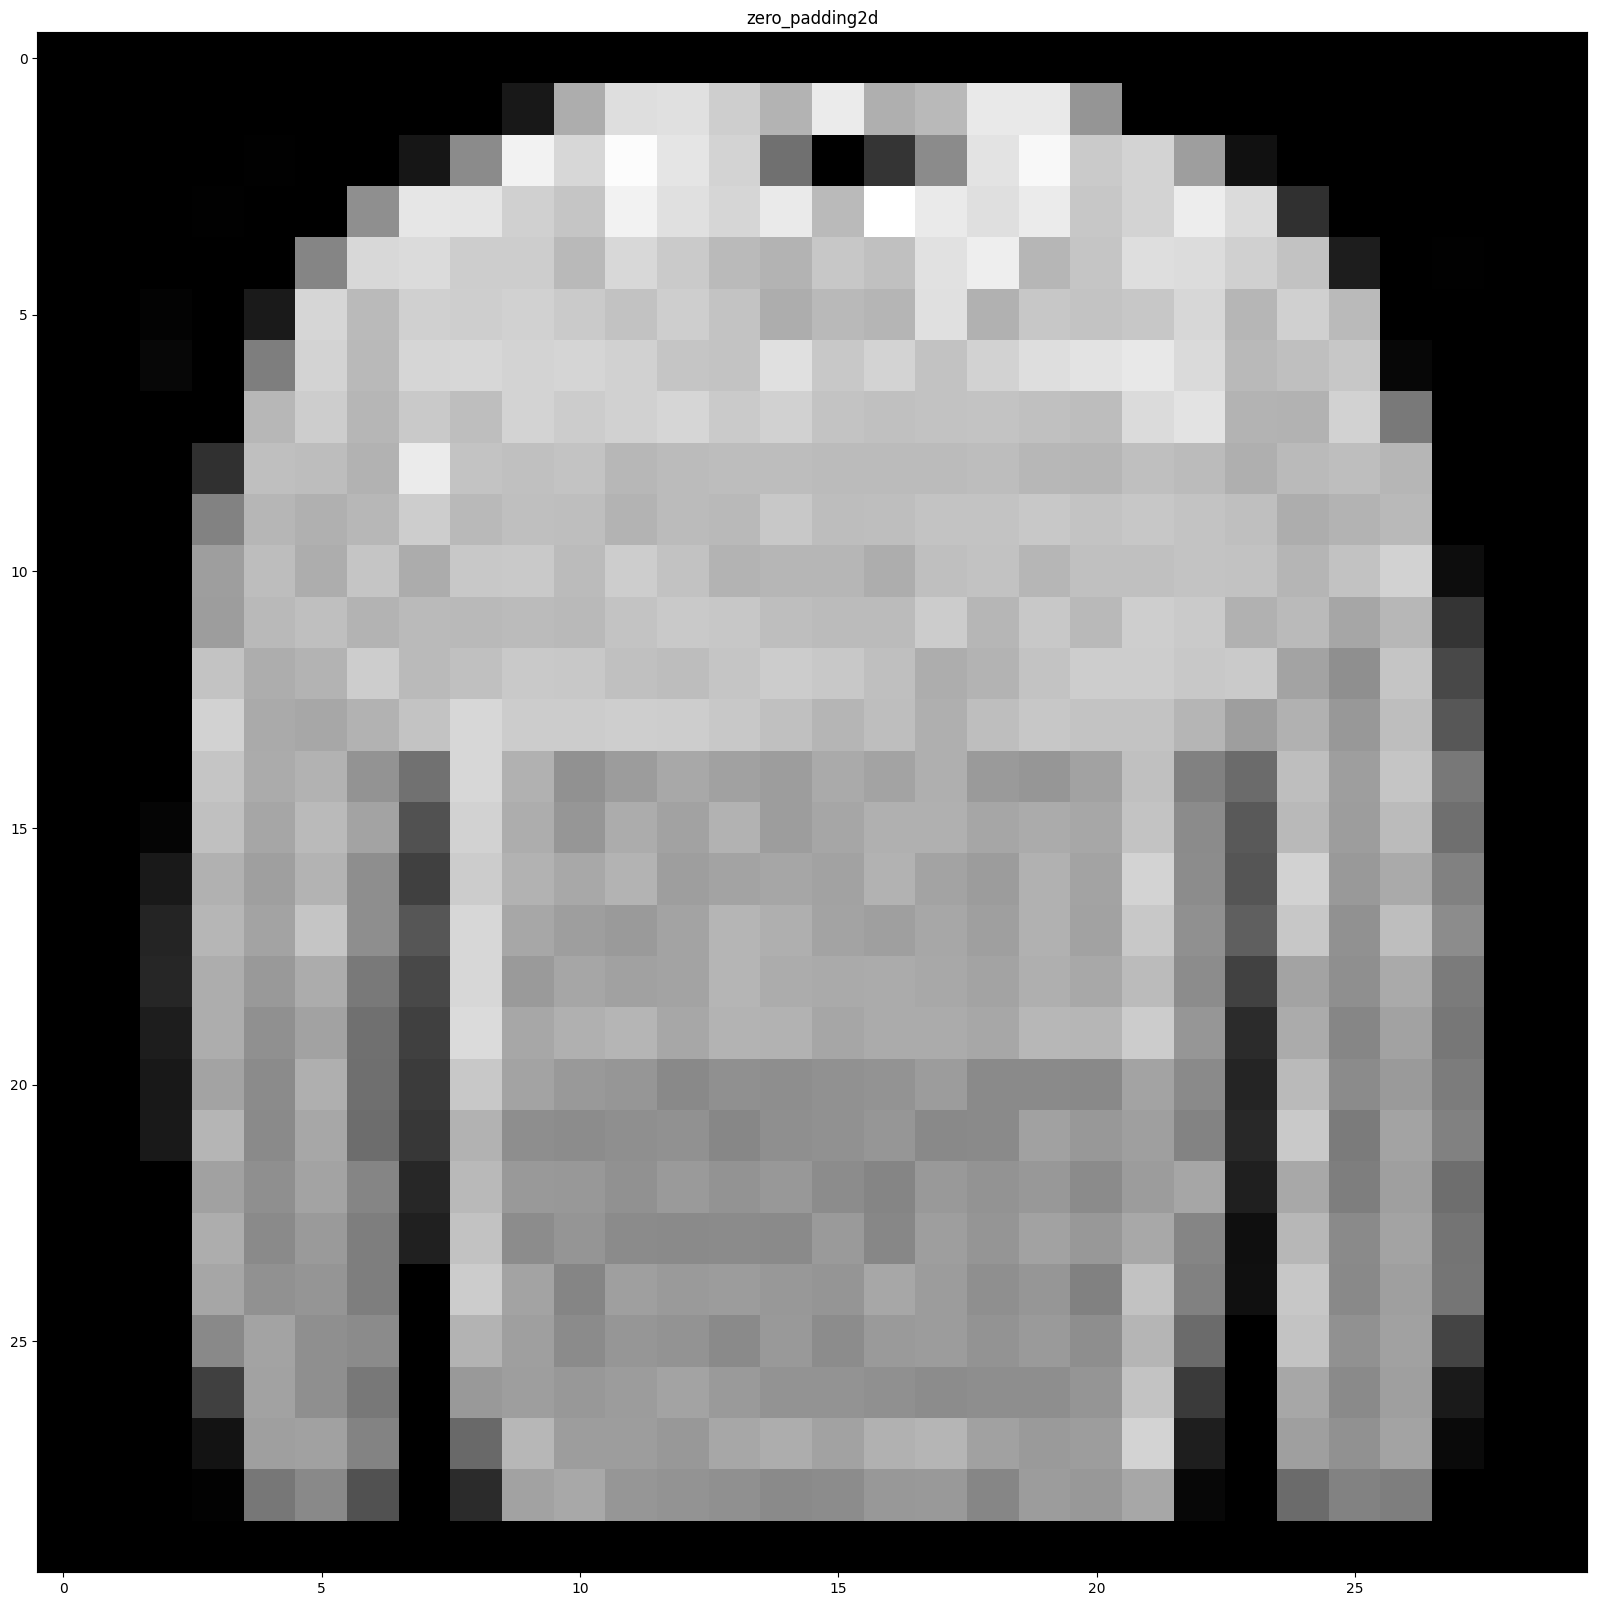

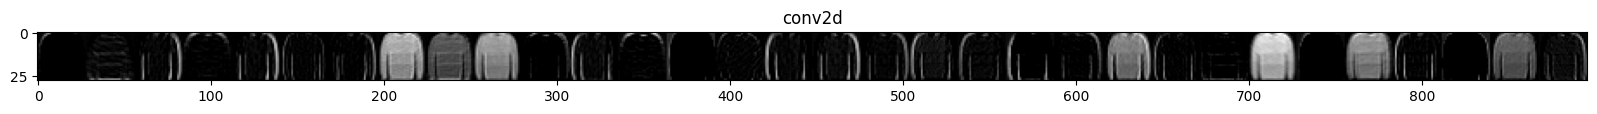

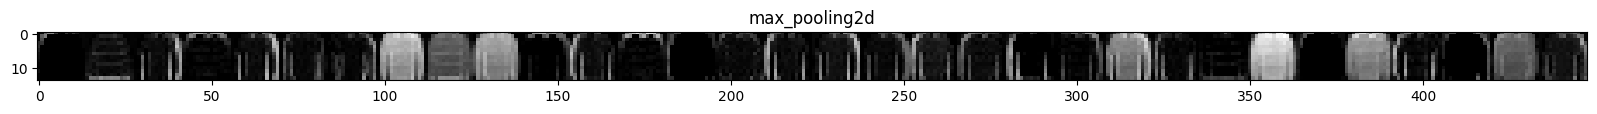

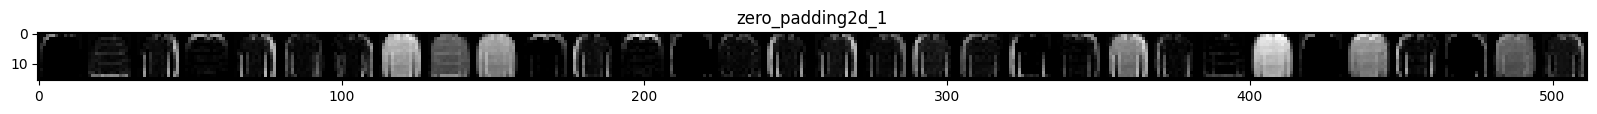

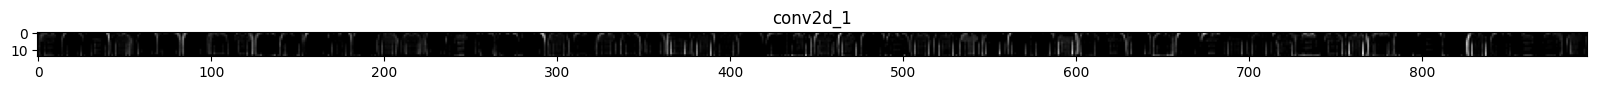

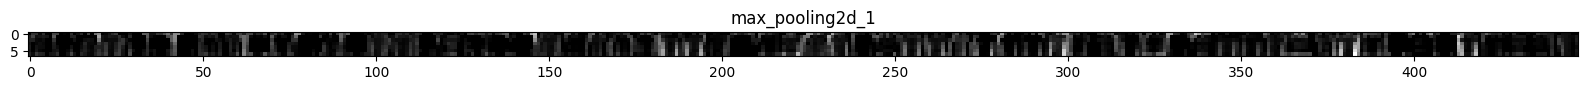

In [55]:
sample_image = np.expand_dims(X_test[20], axis=0)

# Specify the layer names to visualize
layer_names = ['zero_padding2d', 'conv2d', 'max_pooling2d', 'zero_padding2d_1', 'conv2d_1', 'max_pooling2d_1']

# Visualize the feature maps
visualize_feature_maps(model, layer_names, sample_image)